In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scipint # for problem 2
from mpl_toolkits import mplot3d # for plotting in problem 3

# Problem 1

*Write an RK4 integrator with prototype to take one step: "def rk4_step(fun,x,y,h)" and use it to integrate $\frac{dy}{dx} = \frac{y}{1+x^2}$ from $x=-20$ to $x=20$ with $y(-20)=1$ using 200 steps.*

*Write another stepper "def rk4_stepd(fun,x,y,h)" that takes a step of length $h$, compares that to two steps of length $h/2$ and uses them to cancel out the leading-order error term from RK4.*

*How many function evaluations per step does this one use? Use this modified stepper to carry out the same ODE solution using the same number of function evaluations as the original. Which is more accurate? (Analytic solution is $y=c_0exp(arctan(x))$.*

The rk4_step code uses the code from class (rk4 from "interprigrate/rk4.py"), but I've changed it so y is 1-dimensional since we're working with a first derivative in the differential equation.

rk4_stepd uses rk4_step to evaluate the equation at two half steps ($y_2$), then subtracts off the result from taking one full step ($y_1$) to cancel the order $h^5$ error using: $y(x+2h) = y_2 + \frac{y_2-y_1}{15} + O(h^6)$, where $y(x+2h)$ is the true solution. (From the textbook https://people.cs.clemson.edu/~dhouse/courses/817/papers/adaptive-h-c16-2.pdf). So the more accurate solution from rk4_stepd is $y_2 + \frac{y_2-y_1}{15}$.

In [2]:
# Differential equation:
def f(x,y):
    f.counter +=1
    dydx = y/(1+x**2)
    return dydx

# rk4 stepper (from class, but 1-dimensional y)
def rk4_step(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

# Function to take rk4 using two h/2 steps, compare to one
# h-step and cancel leading order term:
def rk4_stepd(fun,x,y,h):
    
    # single h step with rk4
    y1 = rk4_step(fun, x, y, h)

    # two h/2 steps with rk4
    y2a = rk4_step(fun, x, y, h/2) # need this as input to get y(x+h/2)
    y2b = rk4_step(fun, x+h/2, y2a, h/2) # final result
    y2 = y2b
    
    # cancel leading order terms and return
    return y2*(1+1/15) - y1/15

function called 796 times


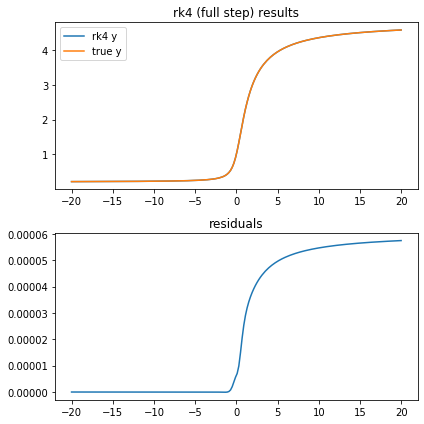

In [4]:
# get x-data for 200 steps from -20 to 20
npt=200
x=np.linspace(-20,20,npt)

# initialize y=f(x)
y = np.zeros(npt)

# use analytical result to get initial y
y[0] = np.exp(np.arctan(x[0])) 

# start function call counter at zero
f.counter = 0

# loop through steps and call rk4
for i in range(npt-1):
    
    # define h-steps
    h=x[i+1]-x[i]
    
    # evaluate y using rk4_step
    y[i+1]=rk4_step(f,x[i],y[i],h)
    
# get the analytical result to compare
y_true=np.exp(np.arctan(x))

# print number of function calls and save for later
print('function called {} times'.format(f.counter))
rk4_step_calls = f.counter

# get residuals and save the max error
residuals = y_true-y
max_err_rk4 = np.max(residuals)

# plot the results
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,6), tight_layout=True)
ax1.plot(x,y,label='rk4 y')
ax1.plot(x,y_true,label='true y')
ax1.legend()
ax1.set_title('rk4 (full step) results')
ax2.plot(x,residuals)
ax2.set_title('residuals')
fig.savefig('problem1_rk4_step.png')

Fig: The function was called 796 times and agrees with the analytical result.

function called 2388 times


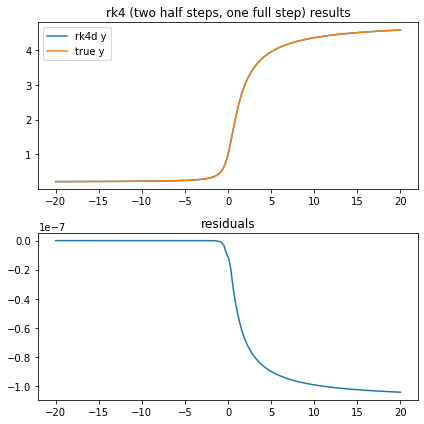

In [5]:
# repeat for rk4_stepd, check the number of function calls
# (x, y, initial y were already set above)

# start function call counter at zero
f.counter = 0

# loop through steps and call rk4_stepd
for i in range(npt-1):
    
    # set step size h
    h=x[i+1]-x[i]
    
    # call rk4_stepd
    y[i+1]=rk4_stepd(f,x[i],y[i],h)

# print number of function calls and save for later
print('function called {} times'.format(f.counter))
rk4_stepd_calls = f.counter

# get residuals
residuals = y_true-y

# plot results
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,6), tight_layout=True)
ax1.plot(x,y,label='rk4d y')
ax1.plot(x,y_true,label='true y')
ax1.legend()
ax1.set_title('rk4 (two half steps, one full step) results')
ax2.plot(x,residuals)
ax2.set_title('residuals')
fig.savefig('problem1_rk4_stepd_{}_calls.png'.format(rk4_stepd_calls))

Fig: function was called 2388 times and are more accurate than the previous results.

reduce steps by a factor of 3.0 to get the same number of function calls
for the same number of function calls, rk4_step max error = 5.74725776347762e-05, rk4_stepd max error = 2.8426159598637923e-05
rk4_stepd reduced error by a factor of 0.5


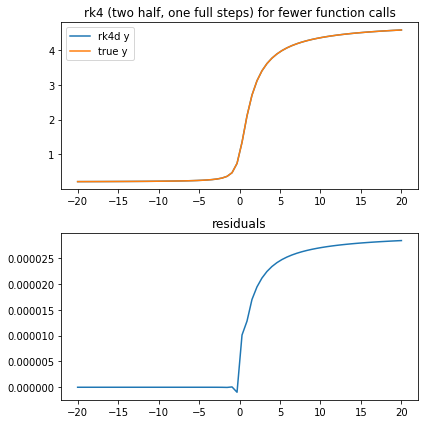

In [7]:
# reduce the number of steps by dividing the new number of 
# function calls by the old number of function calls
factor = rk4_stepd_calls/rk4_step_calls
print('reduce steps by a factor of {} to get the same number of function calls'.format(factor))
npt_reduce = int(npt/factor)

# define a new x, y, initial y, and y_true
x = x=np.linspace(-20,20,npt_reduce)
y = np.zeros(npt_reduce)
y[0] = np.exp(np.arctan(x[0]))
y_true = np.exp(np.arctan(x))

# start function call counter at zero
f.counter = 0

# loop through steps and call rk4_stepd
for i in range(npt_reduce-1):
    
    # set step size
    h=x[i+1]-x[i]
    
    # call rk4_stepd
    y[i+1]=rk4_stepd(f,x[i],y[i],h)

# get residuals and save the max error
residuals = y_true-y
max_err_rk4d = np.max(residuals)

# print errors
print('for the same number of function calls, rk4_step max error = {}, rk4_stepd max error = {}'.format(max_err_rk4, max_err_rk4d))
print('rk4_stepd reduced error by a factor of {}'.format(np.around(max_err_rk4d/max_err_rk4,1)))

# plot results
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,6), tight_layout=True)
ax1.plot(x,y,label='rk4d y')
ax1.plot(x,y_true,label='true y')
ax1.set_title('rk4 (two half, one full steps) for fewer function calls')
ax1.legend()
ax2.plot(x,y_true-y)
ax2.set_title('residuals')
fig.savefig('problem1_rk4_stepd_{}_calls.png'.format(rk4_step_calls))

Fig: rk4_stepd is more accurate (by a factor of ~0.5) than rk4_step for the same number of function calls.

# Problem 2

*(a) Write a program to solve for the decay products of U238 (see slides for decay chain). Use ODE solver from scipy but set up problem properly. Include all decay products in the chain. Assume you start from a pure U238 sample. Which solver would you use for this problem?*

*(b) Plot the ratio of Pb206 to U238 as a function of time over a region where it's interesting. Does it make sense analytically? (Decay chain shows that all the half lives are short compared to U238 so you can approcimate the U238 decaying instantly to lead.) Plot the ratio of Thorium 230 to U234 over an interesting region. (This is used to date rocks, these results point at how you can determine the age of a uranium-bearing rock that could be thousands to billions of years old).*

I couldn't find the slides with the decay chain so I'm using this one: https://en.m.wikipedia.org/wiki/File:Fr_Decay_chain_Uranium_238.svg

Some math notes: half lives are related to decay constants by $t_{1/2}=\frac{ln(2)}{\lambda}$ for the differential equation: $\frac{dN_1}{dt} = -\lambda_1 N_1$ where $N_1$ is the number of decaying nuclei.

If the decay product is also able to decay then the differential equation is  $\frac{dN_2}{dt} = -\lambda_2N_2 + \lambda_1 N_1$ where $N_2$ is the concentration of the decay product.

For a bigger chain, the differential equation for the $n^{th}$ decay is $\frac{dN_n}{dt} = -\lambda_n N_n + \lambda_{n-1} N_{n-1}$.

I'm using scipy.integrate.solve_ivp, which I tested for a few choices of integration method. Both Radau and BDF perform very well, whereas RK45, RK23, and DOP853 were too slow.

In [8]:
# define some half lives (in years). The last 
# product in the chain (Pb-206) is stable
t_u238 = 4.5e9
t_th234 = 24.1/365 # days to years
t_pa234 = 1.17*(1/60)*(1/24)*(1/365) # minutes to years
t_u234 = 2.455e5
t_th230 = 75380
t_ra226 = 1602
t_rn222 = 3.82/365 # days to years 
t_po218 = 3.1*(1/60)*(1/24)*(1/365) # minutes to years
t_pb214 = 26.8*(1/60)*(1/24)*(1/365) # minutes to years
t_bi214 = 19.9*(1/60)*(1/24)*(1/365) # minutes to years
t_po214 = 164.3e-6*(1/60)*(1/60)*(1/24)*(1/365) # seconds to years
t_pb210 = 22.2
t_bi210 = 5.01/365 # days to years
t_po210 = 138/365 # days to years

# put them together
half_lives = np.array([t_u238, t_th234, t_pa234, t_u234, t_th230, t_ra226, t_rn222, 
                      t_po218, t_pb214, t_bi214, t_po214, t_pb210, t_bi210, t_po210])

# starting concentrations (all zero except U-238)
N0 = np.zeros(len(half_lives)+1) # +1 for Pb-206
N0[0] = 6e22 # about a mole

# define the differential equation for each product in the chain
def diff_eqs(t,y,t_half):
    
    # relate half lives to decay constants
    lambdas = np.log(2)/t_half
    
    # number of products, +1 to include Pb-206
    n = len(t_half)+1
    
    # initialize array of differential equations
    dNdt = np.zeros(n)
    
    # first equation is for decay of U-238, 
    # which doesn't depend on a previous decay
    dNdt[0] = -lambdas[0]*y[0] 
    
    # last equation is for Pb-206 which has no decay constant
    dNdt[-1] = lambdas[-2]*y[-2] 
    
    # loop to get dN/dt for all decay products
    for i in range(1,n-1):
        dNdt[i] = -lambdas[i]*y[i] + lambdas[i-1]*y[i-1]
    
    return dNdt

    
# get results for Radau and BDF over a timespace of 50 billion years
t_end = 5e10 
sol_rad = scipint.solve_ivp(diff_eqs, [0.0,t_end], N0, method='Radau', args=[half_lives], dense_output=True)
sol_bdf = scipint.solve_ivp(diff_eqs, [0.0,t_end], N0, method='BDF', args=[half_lives], dense_output=True)

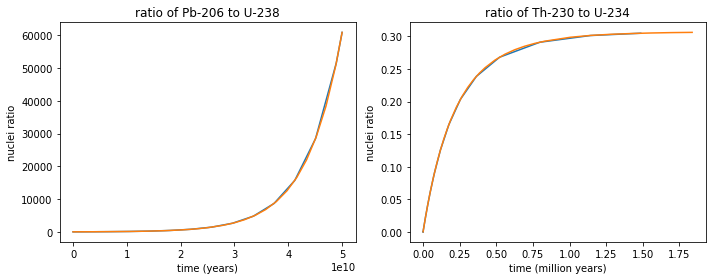

In [9]:
# plot results for both methods
t, N = [sol_rad.t, sol_bdf.t], [sol_rad.y, sol_bdf.y]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4), tight_layout=True)

# plot ratio of Pb-206 to U-238 over full timespan
ax1.plot(t[0], N[0][-1]/N[0][0], label='Radau result')
ax1.plot(t[1], N[1][-1]/N[1][0], label='BDF result')
ax1.set_xlabel('time (years)')
ax1.set_ylabel('nuclei ratio')
ax1.set_title('ratio of Pb-206 to U-238')

# plot ratio of Th-230 to U-234 from 0 to 2 million years
mask_time = (t[0]>0)&(t[0]<2e6)
ax2.plot(t[0][mask_time]/1e6, N[0][4,mask_time]/N[0][3,mask_time], label='Radau result')
mask_time = (t[1]>0)&(t[1]<2e6)
ax2.plot(t[1][mask_time]/1e6, N[1][4,mask_time]/N[1][3,mask_time], label='BDF result')
ax2.set_xlabel('time (million years)')
ax2.set_ylabel('nuclei ratio')
ax2.set_title('ratio of Th-230 to U-234')
fig.savefig('problem2_product_ratios.png')

Fig: The results from using the BDF method are smoother than those from Radau. The ratio of U-238 to Pb-206 makes sense, U-238 is the first product in the chain which decays exponentially and Pb-206 is the last product in the chain which accumulates exponentially (based on the analytical solution to $\frac{dN}{dt} = -\lambda N$). The accumulation of Th-230 directly depends on U-234's decay so their ratio plateaus after a few hundred thousand years. The ratio can be used to figure out how long ago the rocks formed.

# Problem 3

*Linear least squares fit to real data from the file "dish_zenith.txt" containing photogrammetry data for a prototype telescope dish. Photogrammetry attempts to reconstruct surfaces by working out the 3-dimensional positions of targets from many pictures. This results in "dish_zenith.txt" containing the (x,y,z) positions in mm of a few hundred targets placed on the dish. The ideal telescope dish should be a rotationally symmetric paraboloid. We're trying to measure the shape of that paraboloid and see how well we did.*

*(a) The points are oriented s.t. the dish is pointing in the +z direction. For a rotationally symmetric paraboloid, we have: $z-z_0 = a((x-x_0)^2 + (y-y_0)^2)$ and we need to solve for $x_0, y_0, z_0$, and $a$. Show we can pick a new set of parameters that make the problem linear. What are these new parameters and how do they relate to the old ones?*

*(b) Carry out the fit and find the best-fit parameters.*

*(c) Estimate the noise in the data, and from that, estimate the uncertainty in $a$. The target focal length was 1.5 m. What did we actually get and what is the error bar? Note: a parabola that goes through (0,0) can be written as $y=\frac{x^2}{4f}$ where $f$ is the focal length. When calculating the error bar for the focal length, approximate using a first-order Taylor expansion.*

## (a)

We want to make $z-z_0 = a(x-x_0)^2 + a(y-y_0)^2$ linear (constants times a linear combination of independent variables) such that the data is modeled by $d=Am$ and solve the linear least squares equation $A^TN^{-1}Am = A^TN^{-1}d$. So let $d=z$ and expand:

$z = a(x^2+y^2) - 2ax_0x - 2ay_0y + ax_0^2 + ay_0^2 + z_0$.

This is an equation of the form $z = c_0(x^2 + y^2) + c_1x + c_2y + c_3$.

The 4-parameter model for data $z$ is:

$z = Am = \begin{pmatrix}
1 & x[0] & y[0] & x[0]^2+y[0]^2\\
1 & x[1] & y[1] & x[1]^2+y[1]^2\\
1 & x[2] & y[1] & x[2]^2+y[2]^2\\
... & ... & ... & ...
\end{pmatrix} \begin{pmatrix}
c_3 \\
c_1 \\
c_2 \\
c_0
\end{pmatrix} 
= \begin{pmatrix}
1 & x[0] & y[0] & x[0]^2+y[0]^2\\
1 & x[1] & y[1] & x[1]^2+y[1]^2\\
1 & x[2] & y[1] & x[2]^2+y[2]^2\\
... & ... & ... & ...
\end{pmatrix} \begin{pmatrix}
ax_0^2 + ay_0^2 + z_0 \\
-2ax_0 \\
-2ay_0 \\
a
\end{pmatrix}$ 

Ignoring the noise matrix $N$, the fit parameters are given by $m = (A^TA)^{-1}A^Td$.

Then use these fit parameters to find $a$, $x_0$, $y_0$, and $z_0$: 

$a=c_0$, $x_0 = -\frac{c_1}{2c_0}$, $y_0 = -\frac{c_2}{2c_0}$, and $z_0 = c_3 - \frac{c_1^2 + c_2^2}{2}$

## (b)

Load data, carry out fit and print fit parameters, compare predicted data to real data.

best fit parameters are a = 0.00016670445477401342, x0 = -1.3604886221974484, y0 = 58.22147608157965, z0 = -2.1802729809754017e-05


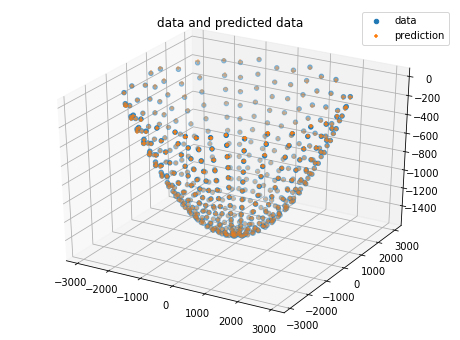

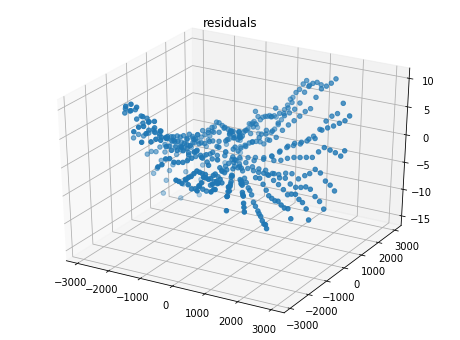

In [10]:
# load the data
dat = np.loadtxt('dish_zenith.txt')
x,y,z = dat[:,0],dat[:,1],dat[:,2]

# make the A matrix
n = dat.shape[0] # length of data
nparams = 4 # total number of fit parameters
A = np.empty([n, nparams])
A[:,0] = 1
A[:,1] = x
A[:,2] = y
A[:,3] = x**2 + y**2

# solve for parameters (m) in (noiseless) LLS
lhs = A.T@A
rhs = A.T@z
fitp = np.linalg.inv(lhs)@rhs

# get predicted data from the model
pred = A@fitp

# relate m back to a, x0, y0, z0
a = fitp[3]
x0 = -0.5*fitp[1]/fitp[3]
y0 = -0.5*fitp[2]/fitp[3]
z0 = fitp[3] - 0.5*(fitp[2]**2 + fitp[1]**2)

# print results
print('best fit parameters are a = {}, x0 = {}, y0 = {}, z0 = {}'.format(a,x0,y0,z0))

# plot results
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter(x,y,z, label='data')
ax.scatter(x,y,pred, marker='+', label='prediction')
ax.set_title('data and predicted data')
ax.legend()
fig.savefig('problem3_model_data.png')

# plot residuals
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
z_residuals = z-pred
ax.scatter(x,y,z_residuals)
ax.set_title('residuals')
fig.savefig('problem3_residuals.png')

Fig: The predicted data look good and the z-residuals look like they're somewhere around 1% (?) off.

## (c) 

Estimate noise, then the uncertainty in $a$, error in $f$ via Taylor expansion. Uncertainty in parameters should be $(A^TN^{-1}A)^{-1}$.

Assume white, uncorrelated noise. Then estimate the noise using the scatter between true z and predicted z: fill the diagonals of $N$ with $\sigma$'s where $\sigma^2 = std((z_{true}-z_{predicted})^2)$.

In [11]:
# estimate the errors as the scatter between z and predicted z
errs = np.sqrt(np.std((z_residuals**2)))

# assume uncorrelated and fill N diagonal elements with the errors
N = errs*np.eye(n)
Ninv = np.linalg.inv(N)

# get errors of fit parameters
fitp_errs = np.linalg.inv(A.T@(Ninv@A))
print('fit parameter errors = ', fitp_errs)

fit parameter errors =  [[ 3.50617073e-02  6.63193072e-08  4.31390431e-07 -6.03344999e-09]
 [ 6.63193072e-08  5.63270535e-09  2.14999040e-10  4.19278711e-14]
 [ 4.31390431e-07  2.14999040e-10  5.12136996e-09 -7.25038047e-14]
 [-6.03344999e-09  4.19278711e-14 -7.25038047e-14  1.49915926e-15]]


I'm stuck, sorry! I know for a single parameter model the error is just $\frac{1}{\sqrt{A^T N^{-1}A}}$. I also have to abandon this problem set now. I think if I had the error in $a$, I could relate the equation for the paraboloid to $y=x^2/(4f)$, then propagate the error in $a$ to the error in focal length $f$. And relate $a$ to the focal length to see how well it agrees with 1.5 m.